# 1. Data set 확인 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #시각화 라이브러리
import seaborn as sns #matplot을 보조하는 시각화 패키지
import missingno as msno #결측값 확인하는데 사용하는 라이브러리 (! pip install missingno)을 통해 설치 후 이용
plt.style.use('seaborn')
sns.set(font_scale=2.5)  #시각화 폰트 설정
import warnings
warnings.filterwarnings('ignore') #warnings massage 무시
#시각화 자료 바로 보여주기
%matplotlib inline 

ValueError: list.remove(x): x not in list

In [2]:
df_train=pd.read_csv('C:/Users/Hyun/Desktop/Data Science/Kuggle/kaggle/Titanic data/train.csv')

In [3]:
df_test=pd.read_csv('C:/Users/Hyun/Desktop/Data Science/Kuggle/kaggle/Titanic data/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe() #describe() : 데이터 프레임 수치요약 함수, count는 자료개수
                    #Age의 수가 714로 결측값이 있음을 알 수 있다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1.1 Null data check

In [6]:
#결측값이 얼마나 있나 알아보기 위해 함수 작성-df_train.shape : df 차원 알려줌
for col in df_train.columns:
    msg='column: {:>10}\t percent of NA value:{:.2f}%'.format(col,100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NA value:0.00%
column:   Survived	 percent of NA value:0.00%
column:     Pclass	 percent of NA value:0.00%
column:       Name	 percent of NA value:0.00%
column:        Sex	 percent of NA value:0.00%
column:        Age	 percent of NA value:19.87%
column:      SibSp	 percent of NA value:0.00%
column:      Parch	 percent of NA value:0.00%
column:     Ticket	 percent of NA value:0.00%
column:       Fare	 percent of NA value:0.00%
column:      Cabin	 percent of NA value:77.10%
column:   Embarked	 percent of NA value:0.22%


In [7]:
#결측값이 얼마나 있나 알아보기 위해 함수 작성-df_test
for col in df_test.columns:
    msg='column: {:>10}\t percent of NA value:{:.2f}%'.format(col,100*(df_test[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 percent of NA value:0.00%
column:     Pclass	 percent of NA value:0.00%
column:       Name	 percent of NA value:0.00%
column:        Sex	 percent of NA value:0.00%
column:        Age	 percent of NA value:9.65%
column:      SibSp	 percent of NA value:0.00%
column:      Parch	 percent of NA value:0.00%
column:     Ticket	 percent of NA value:0.00%
column:       Fare	 percent of NA value:0.11%
column:      Cabin	 percent of NA value:36.70%
column:   Embarked	 percent of NA value:0.00%


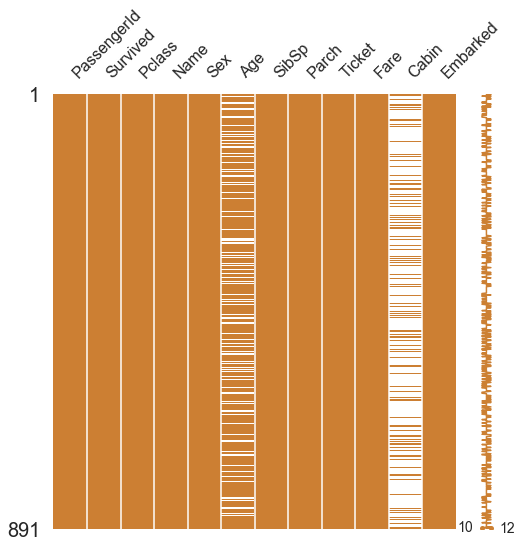

In [8]:
#missingno 라이브러리를 통해 결측값 탐색
msno.matrix(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2)) 
#figsize : 그래프 크기 조절, color : 색상(R,G,B) 

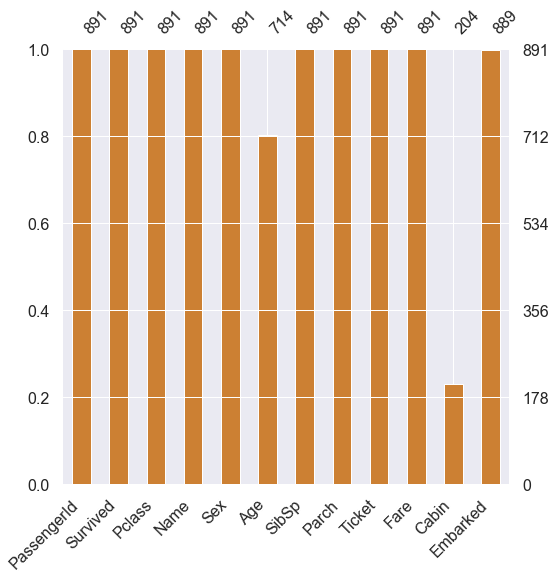

In [9]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.5,0.2))

## 1.2 Target label 확인

In [10]:
#해당 분석에서 target label인 Sunvived이 어떤 분포를 가지고 있는지 확인해야 한다
#분포에 따라 모델 형성과 평가 방법이 달라지기 때문

Text(0.5, 1.0, 'Count plot - Survived')

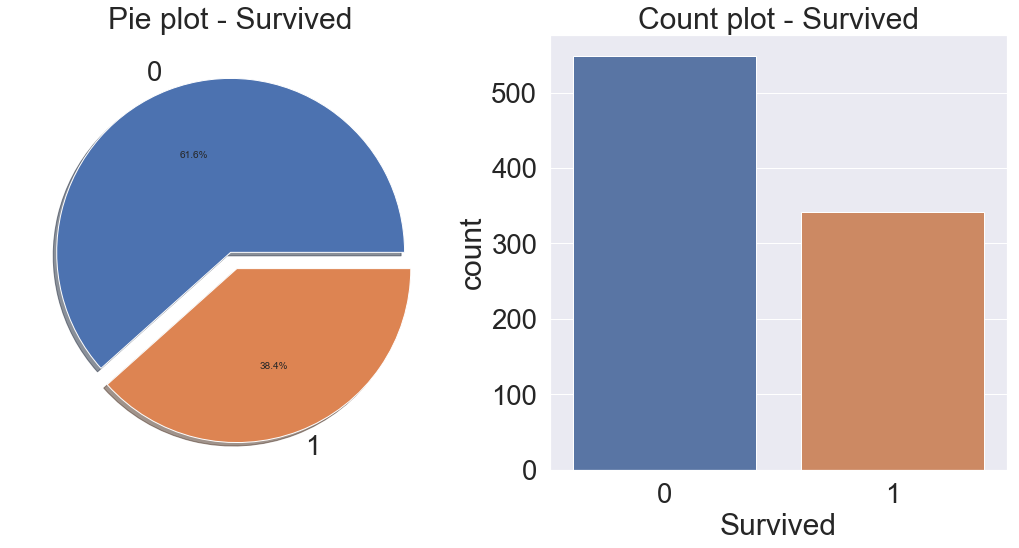

In [11]:
f, ax=plt.subplots(1,2,figsize=(18,8)) #plt.subplots : 그림판 만들기, mfrow랑 비슷한 기능
#f는 figsize ax는 위치(1,2)
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
#df의 Survived열 값별로 더하기(value_counts) 파이그림(plot.pie), explode : 파이 쪼개기
#autopct : 백분율 표시,처음 %는 포맷지정 한다는 소리 그다음 1은 자리수 . 다음 1은 소수점아래 자리수 
#f는 실수라는 소리 %%는 포맷말고 진짜 %를 의미  ax=ax[0] : 위에 설정한 그림판 첫번째 구역에 그릴 것  
#shadow=True 그림자
ax[0].set_title('Pie plot - Survived') #ax[0] 그림판 첫번째 그림에 제목 달기
ax[0].set_ylabel('') #그림판 첫번째 그림에 y축 이름 없애기
sns.countplot('Survived',data=df_train,ax=ax[1]) #막대그래프 그리기
ax[1].set_title('Count plot - Survived')

In [12]:
#해석 - 38.4% 살아남았음, target label이 비교적 균일하다, 불균일한 경우(100중 95가 0 5가 1) 모델 형성에 
#문제가 생길 수 있으나, 이 data의 경우 비교적 균일하므로 계속 진행한다
#imbalaced data : over/under sampling > 보통 under를 많이 하고, 75/25 정도는 되야한다

# 2. EDA

## 2.1 Pclass

In [13]:
#pclass에 따른 생존률 차이를 보기위해, 'Pclass'와 'Survived'를 df로 인덱싱 한 후, Pclass로 groupby
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()
#as_index=Ture : groupby의 기준 변수를 인덱스로 쓸 것인가 True면 쓴다
#밑에 표와 같이 pclass에 따른 생존률을 볼 수 있다

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [14]:
#crosstab 매써드 활용, margins은 각 행렬 sum 산출해줌
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


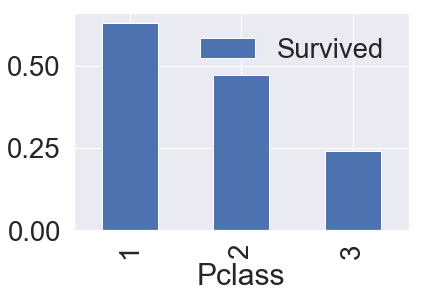

In [15]:
#위에서 했던 groupby df으로 막대그래프 그리기, 뒤에 .plot.bar() 만 추가해주면 됨
df_train[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean().plot.bar()

In [16]:
#해석 - pclass가 높을수록 생존률이 높음을 알 수 있따. 따라서 모델을 세울 때 pclass를 유의하게 사용하는 것이
#좋을 것이라는 판단을 할 수 있다

## 2.2 Sex

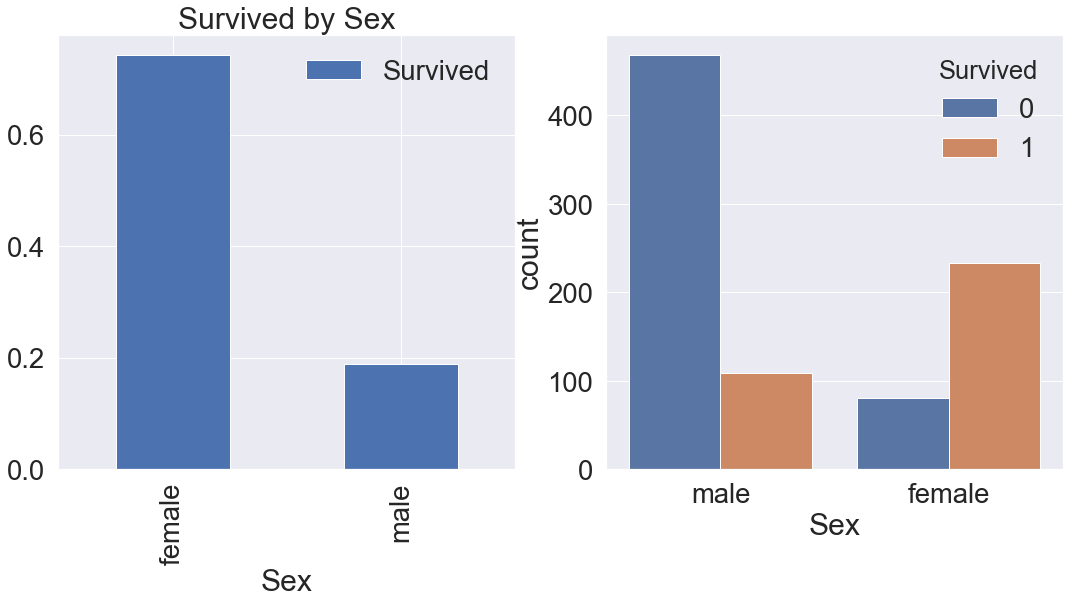

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8)) #1 by 2 팔레트 깔기, f에 figure(그림판)을 넣고 ax에 실제 그림이 그려지는 영역을 넣어 튜플로 반환, 따라서 인덱스가 가능함
df_train[['Sex','Survived']].groupby(['Sex'],as_index=True).mean().plot.bar(ax=ax[0])
#df에서 sex와 survived열 인덱싱 한 뒤 sex로 범주화 as_inex=True를 통해 범주화 한 feature를 인덱스로 사용
#생존률을 보고 싶으므로 mean() plot.bar를 통해 막대그래프 그리기
ax[0].set_title('Survived by Sex')
##seaborn 라이브러리의 countplot 메써드를 활용, 각 카테고리 별로 값이 얼마나 있는지 막대 그래프 그림                                             
sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1]) #hue에 지정된 변수에 따라 색을 다르게 보여줌

In [21]:
#판다스의 crosstab함수 이용 
pd.crosstab(df_train['Sex'],df_train['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [22]:
#결론 - 여자의 생존률이 남자보다 현저히 높으므로 sex변수도 모델링에 유의하게 사용해야한다.

## 2.3 Both Sex and Pclass

In [23]:
#앞서 알아본 sex,pclass에 의해 생존률이 어떻게 달라지는지 보자 - 3 dimension
#seaborn에 factorplot을 활용하면 3차원 그래프 그릴 수 있음

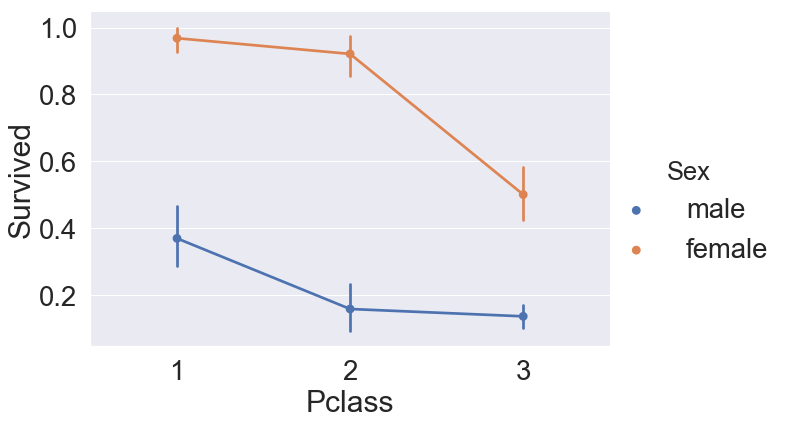

In [33]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train,size=6,aspect=1.5)
#pclass가 x축 survivied가 y축 hue='sex'를 통해 sex를 기준으로 색을 나눔, hue를 쓰지않고 그냥 'Sex'로 
#총 3개 변수를 주어도 factorplot이 3차원 그래프를 그릴 수 있기 때문에 그려짐
#aspect=1이 디폴트 커질수록 좌우 길이를 늘림

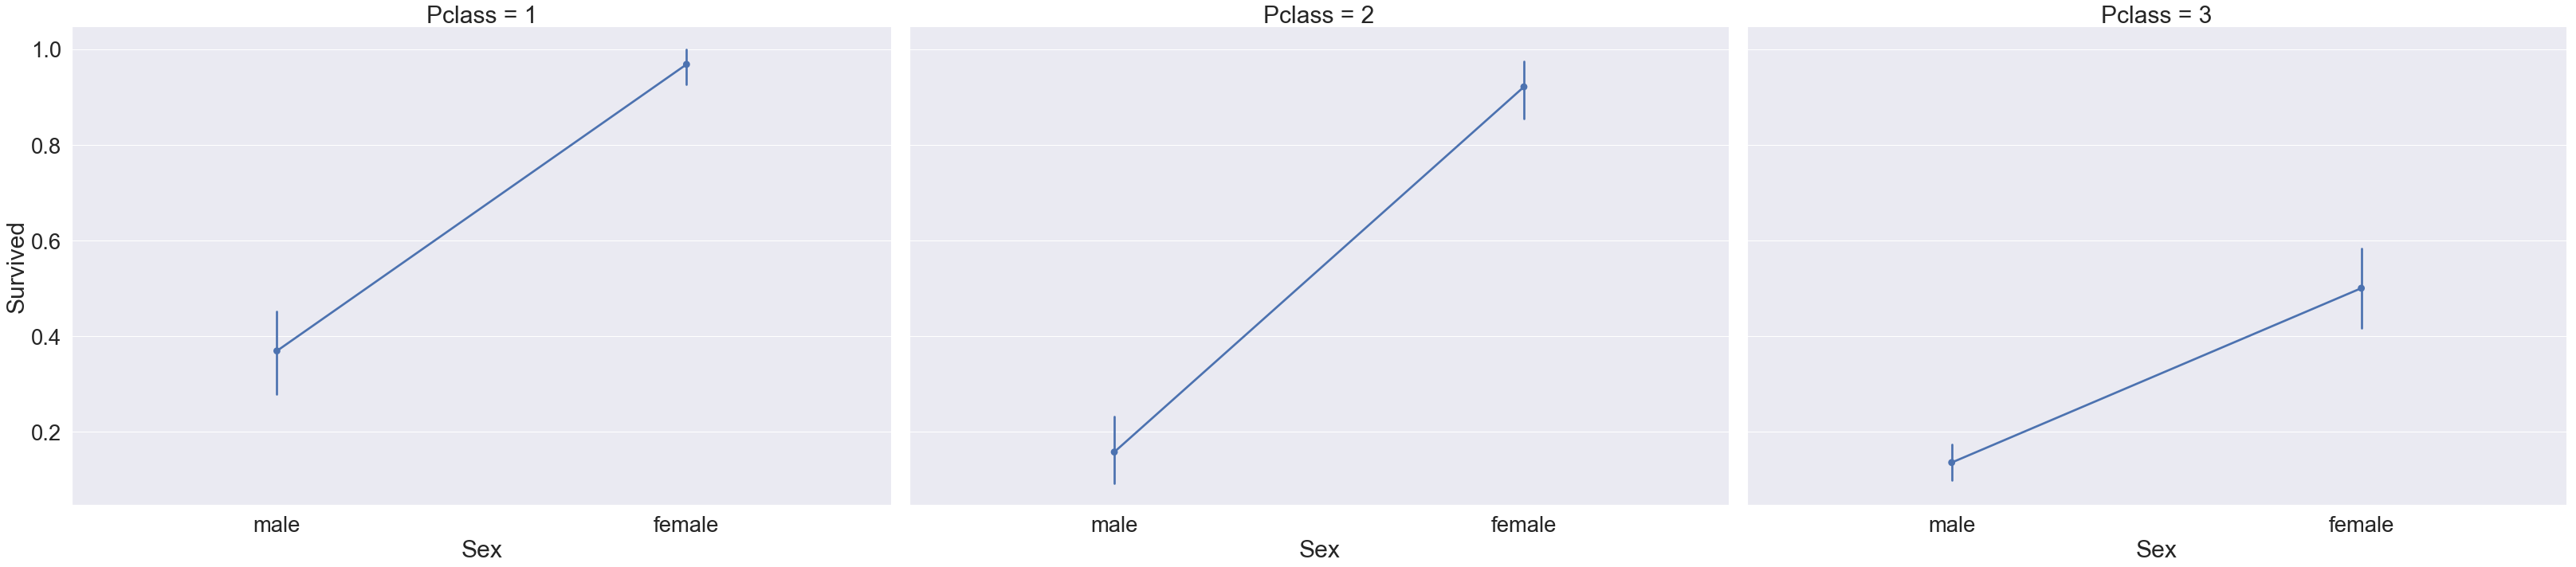

In [42]:
sns.factorplot('Sex','Survived',col='Pclass',data=df_train,size=10,aspect=1.5)
#x축을 sex로 바꾸고 hue대신 col에 pclass를 넣어 pclass 카테고리에 따른 그래프를 그릴 수 있음

## 2.4 Age

In [47]:
print('most old person on titanic : {:.1f} Years'.format(df_train['Age'].max()))
#여기서 사용한 format문은 { } 안을 뭘 산출할지 지정해주는 역할을 한다. :x 는 정수자리수, 
#.:xf는 소수점 아래 자리수 여기서는 {:.1f} 이므로 정수자리는 전부 다, 소수점 아래 한자리까지 산출
print('most young person on titanic : {:.1f} Years'.format(df_train['Age'].min()))
print('most young person on titanic : {:.1f} Years'.format(df_train['Age'].mean()))

most old person on titanic : 80.0 Years
most young person on titanic : 0.4 Years
most young person on titanic : 29.7 Years


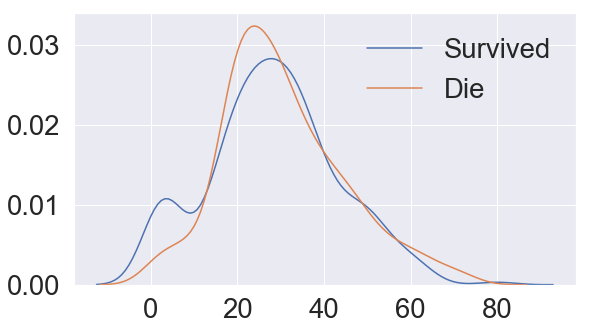

In [59]:
ax=plt.subplots(1,1,figsize=(9,5)) #axis 설정 즉, 팔레트 깔기
sns.kdeplot(df_train[df_train['Survived']==1]['Age'])
#seaborn에 kdeplot : discrete > continues하게 근사 추정해서 매끄럽게 그래프 그려줌
sns.kdeplot(df_train[df_train['Survived']==0]['Age'])
plt.legend(['Survived','Die']) #matplot 함수 legend 범례 설정

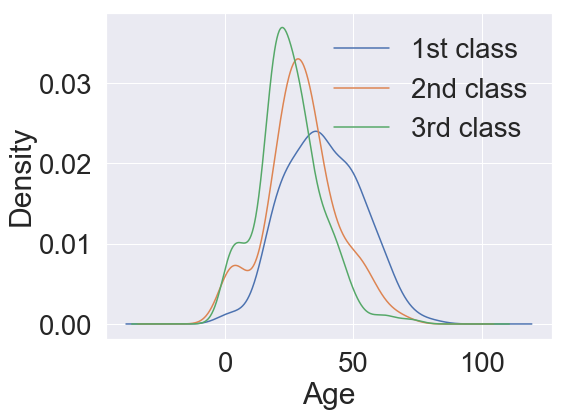

In [64]:
#연령대별 pclass 분포
plt.figure(figsize=(8,6)) #팔래트 까는 다른 방법
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde') #kdeplot을 이런식으로도 그릴 수 있다
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.legend(['1st class','2nd class','3rd class'])

In [ ]:
#해석 - 연령대가 높을수록 좌석이 좋아짐을 알 수 있다.

In [72]:
c_survived_ratio=[] #새로운 오브젝트를 만들기 위해 빈 리스트를 만들어준다

In [73]:
#이후에 append를 이용해 빈 리스트를 채운다
#for문을 이용해 <1부터 <80까지 나이에 따른 누적 생존률을 구한다
for i in range(1,80):
    c_survived_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))

Text(0.5, 0, 'Range of age')

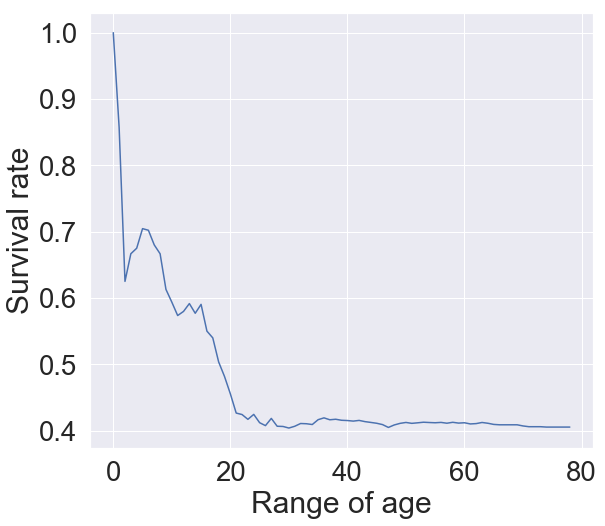

In [81]:
plt.figure(figsize=(9,8)) #크기가 (9,8)인 팔레트 깔기
plt.plot(c_survived_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of age')

In [82]:
# 나이가 어릴수록 생존률이 높음을 알 수 있다

## 2.5 Pclass Sex Age

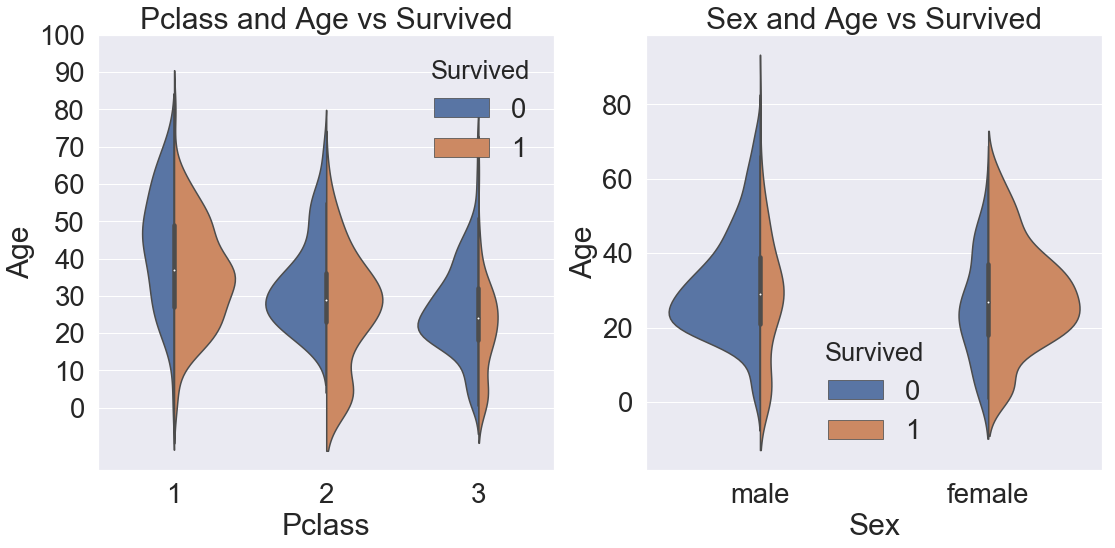

In [86]:
#지금까지 알아본 pclass sex age 변수에 따른 survived를 탐색해보자
#seaborn에 violinplot 사용
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age','Survived',data=df_train,scale='count',split=True,ax=ax[0])
#factorplot과 마찬가지로 3차원 그래프 (x축, y축, 분류가준) 
sns.violinplot('Sex','Age','Survived',data=df_train,scale='count',split=True,ax=ax[1])
#scale='count' : 자료수에 맞춰 그래프를 보여줌, split=True : 바이올린을 쪼개서 시각화
ax[0].set_title('Pclass and Age vs Survived')
ax[1].set_title('Sex and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) #y축 범위 지정 range를 통해 세분화

## 2.6 Embarked 탑승한 항구

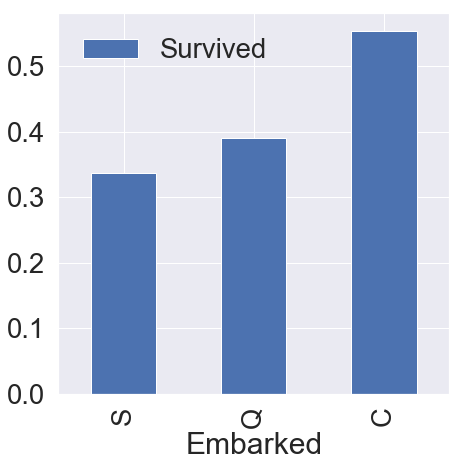

In [88]:
f,ax=plt.subplots(1,1,figsize=(7,7)) #matplot의 subplots으로 팔래트 깔기
df_train[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived').plot.bar(ax=ax)
#sort_values(by='Survived') : survived 변수 기준으로 정렬
#C항구의 생존률이 가장 높음을 알 수 있음

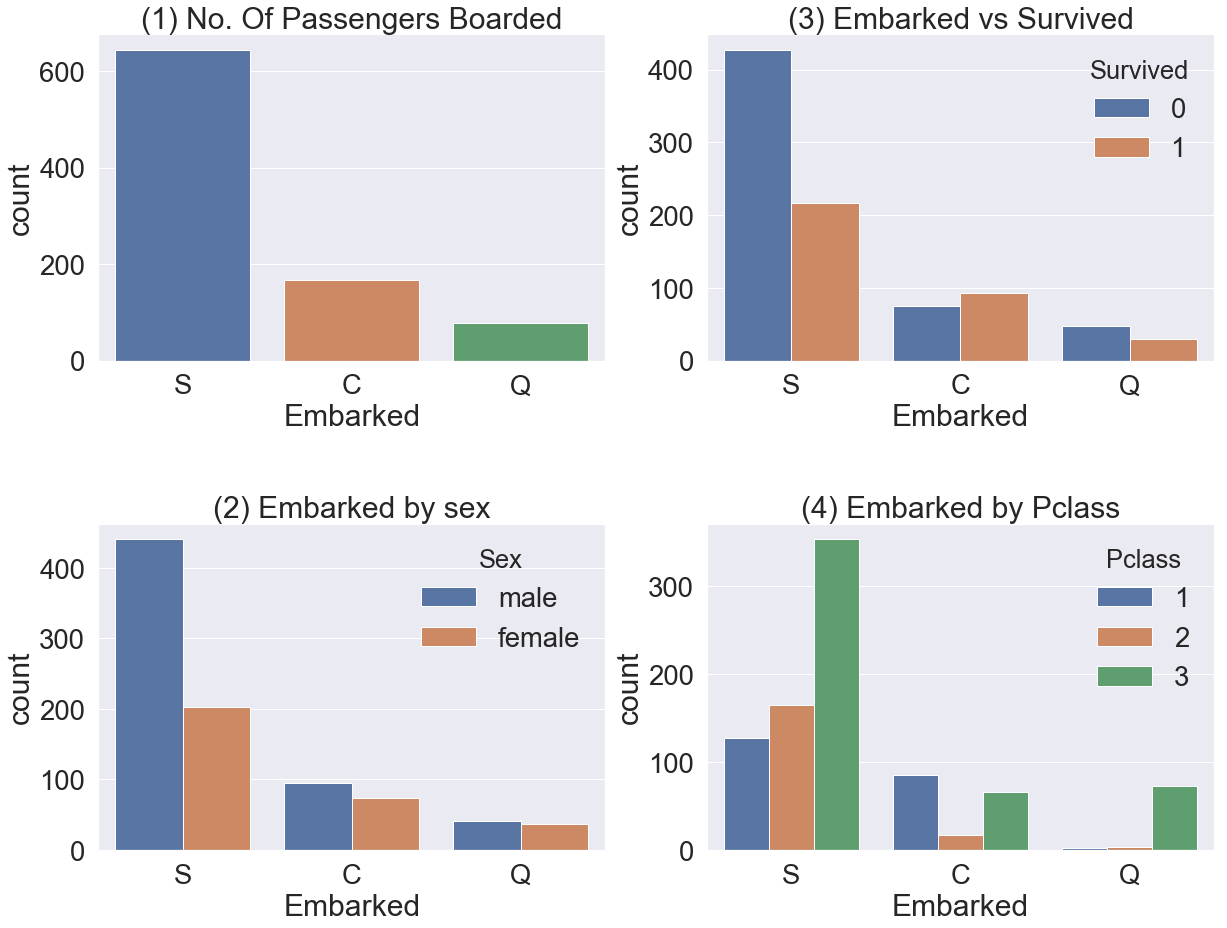

In [92]:
f,ax=plt.subplots(2,2,figsize=(20,15)) #2 by 2 팔래트 깔기
sns.countplot('Embarked',data=df_train,ax=ax[0,0]) #seaborn에 countplot 함수 : 자료 갯수를 그래프로 보여줌
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[1,0])
ax[1,0].set_title('(2) Embarked by sex')
sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[0,1])
ax[0,1].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('(4) Embarked by Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

In [ ]:
#해석 - 전체적으로 S항구에서 가장 많은 사람이 탑승했음을 알 수 있다
#생존률은 C항구 탑승객이 가장 높고 이는 C항구 탑승객 중 여성과 1등석 비율이 높기 때문이다

## 2.7 Family = SibSp(형제자매)+Parch(부모자녀배우자)

In [ ]:
#sibsp parch 두 변수를 더해 family변수로 두고 분석해보자

In [108]:
df_train['Familysize']=df_train['SibSp']+df_train['Parch']+1 #가족 총 구성원 수 이므로 자기자신을 
                                                              #더해야 한다 따라서 +1

In [109]:
print('가장 큰 가족 구성원 수 :',df_train['Familysize'].max())
print('가장 작은 가족 구성원 수 :',df_train['Familysize'].min())

가장 큰 가족 구성원 수 : 11
가장 작은 가족 구성원 수 : 1


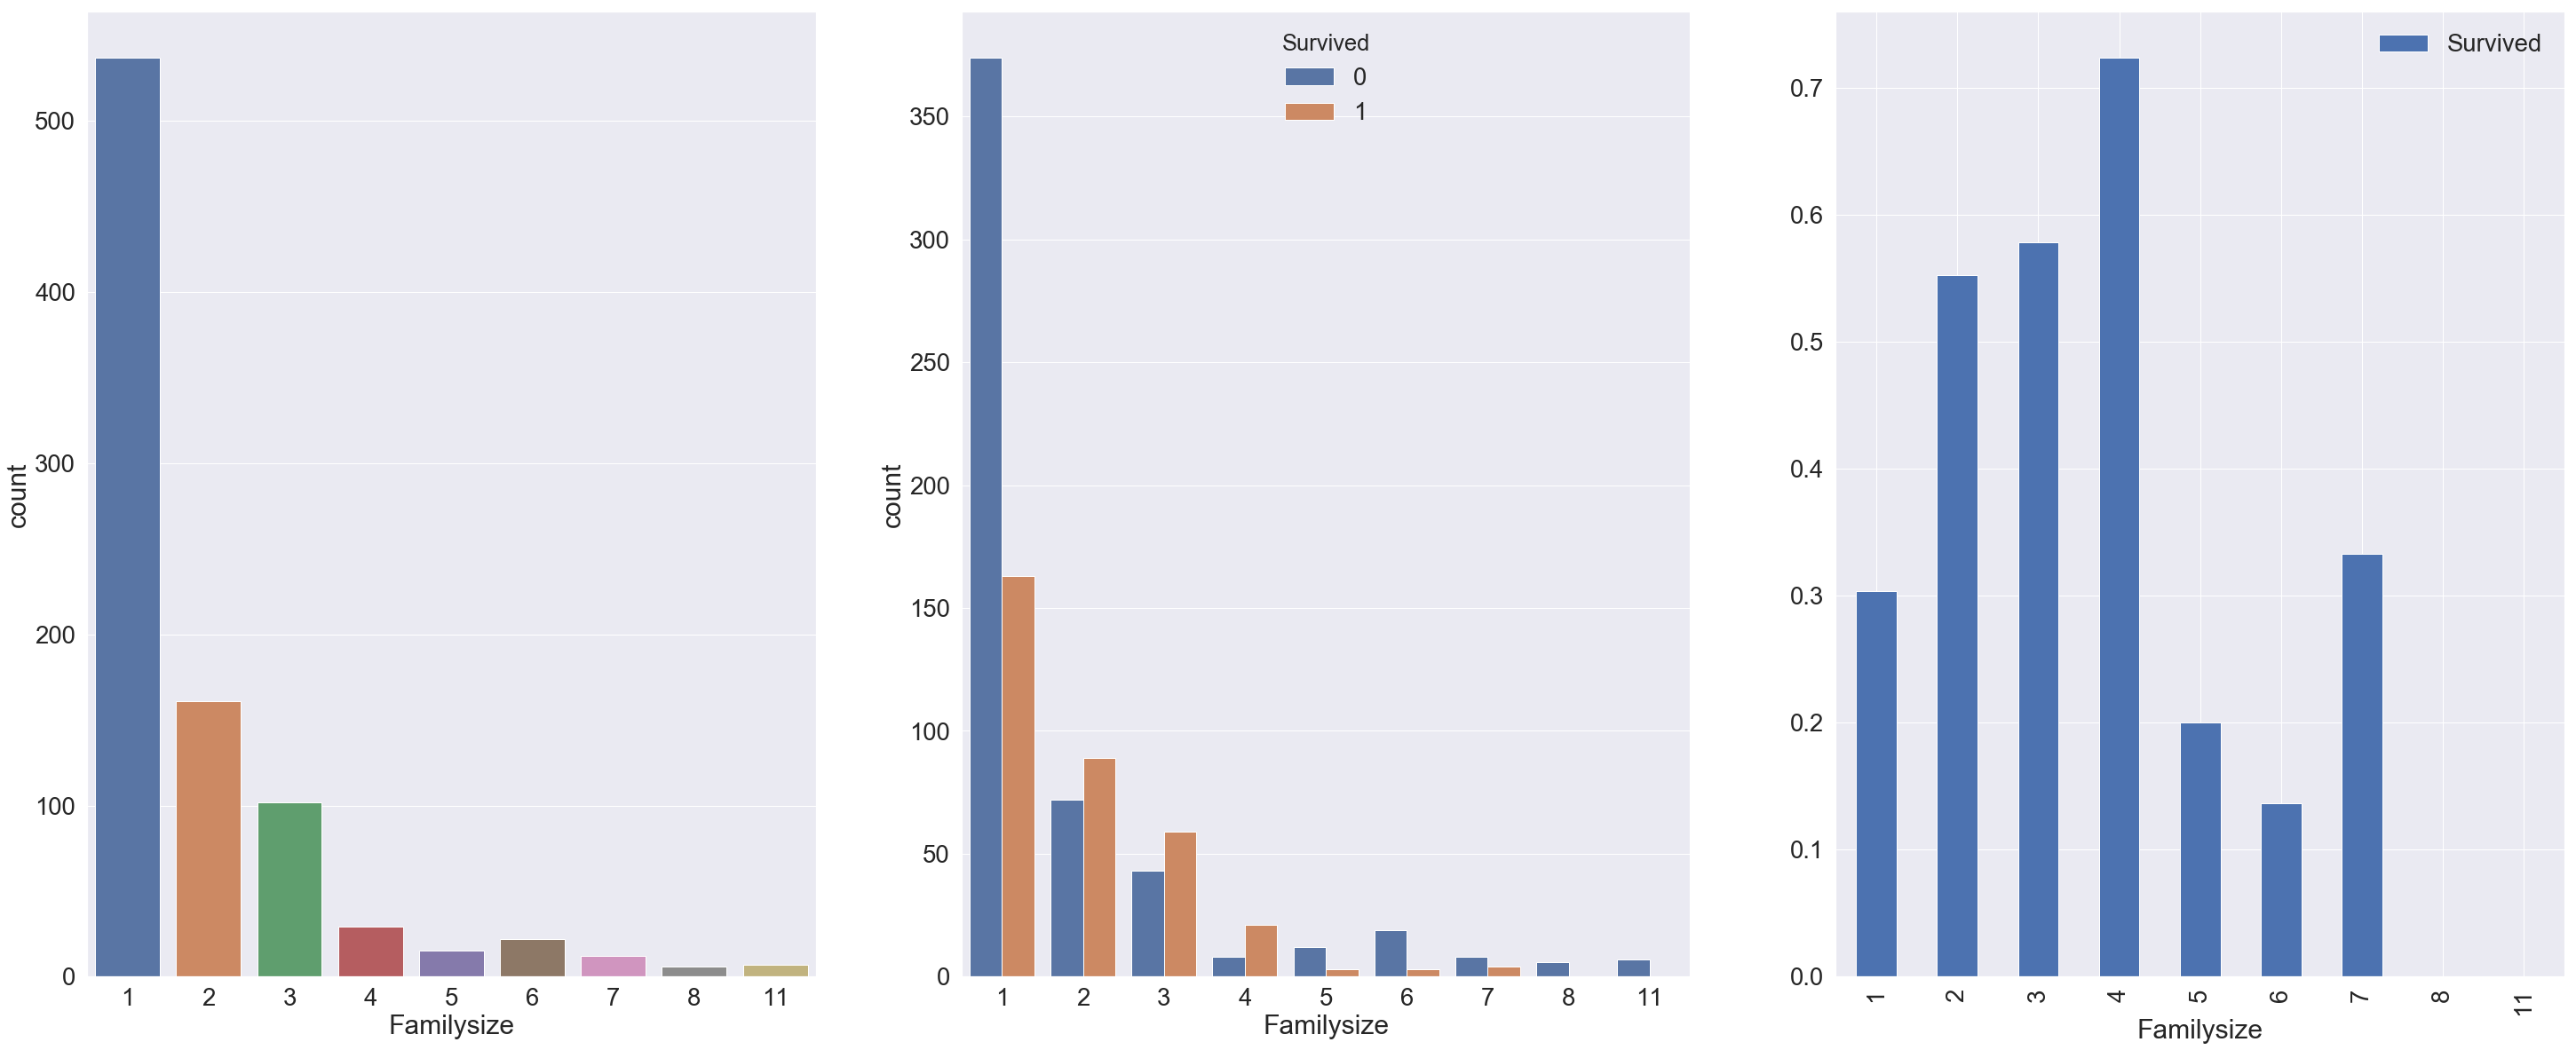

In [114]:
f,ax=plt.subplots(1,3,figsize=(50,20))
sns.countplot('Familysize',data=df_train,ax=ax[0])
sns.countplot('Familysize',hue='Survived',data=df_train,ax=ax[1])
df_train[['Familysize','Survived']].groupby(['Familysize'],as_index=True).mean().sort_values(by='Familysize').plot.bar(ax=ax[2])

In [115]:
#해석 - 가족 구성원수는 1인이 가장 많고 11명까지 있다
#생존률은 4명일때 가장 높으며 가족 구성원이 더 많아지면 줄어들고 수가 너무 작아도 생존률이 낮음을 알 수 있다